# Pokemon Dataset
## Data Cleaning and preprocessing Workshop : AI Open Sessions
#### You can find the data [here](https://)

#### Importing the csv File

In [0]:
from google.colab import files
upladed = files.upload()

Saving pokemon.csv to pokemon.csv


### Importing

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/pokemon.csv')

### EDA : Exploratory data analysis

In [0]:
#Display the first elements of the dataset
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


Check the shape of the dataset

In [0]:
#check the shape of the dataframe
df.shape

(721, 23)

In [0]:
#We use the columns function to see the all columns names
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [0]:
#Descriptive statistics using describe
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [0]:
#Check the types of the columns
df.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [0]:
#Number of null values per column
df.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [0]:
#Number of Legendary and non-legendary Pokemons
print(df['isLegendary'].value_counts())

False    675
True      46
Name: isLegendary, dtype: int64


## Categorical Data

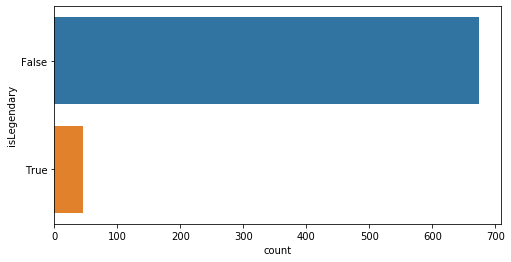

In [0]:
#Plotting 'isLegendary' using seaborn function 'countplot' with countplot function
plt.figure(figsize=(8, 4))
sns.countplot(data = df , y = 'isLegendary')

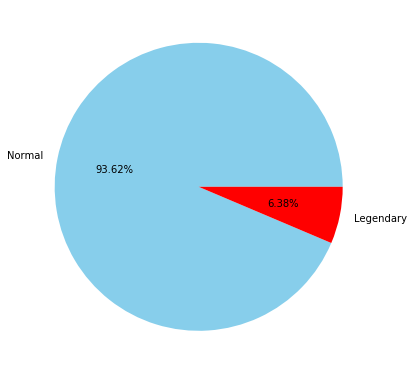

In [0]:
#Now we try a Pie chart
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Survived = df.isLegendary.value_counts() 
labels = ['Normal', 'Legendary']
ax.pie(Survived, labels = labels,autopct='%1.2f%%',colors=['skyblue','red'])
plt.show()

In [0]:
#Print the number of types using nunique()
print('Number of Types : ',df.Type_1.nunique())
#Print the  Types using unique()
print('Types : ',df.Type_1.unique())

Number of Types :  18
Types :  ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


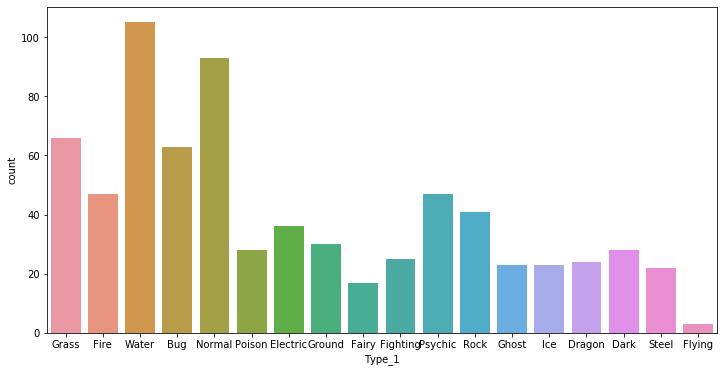

In [0]:
#Plotting 'Type_1' using seaborn function 'countplot' with countplot function
plt.figure(figsize=(12, 6))
sns.countplot(data = df , x = 'Type_1')

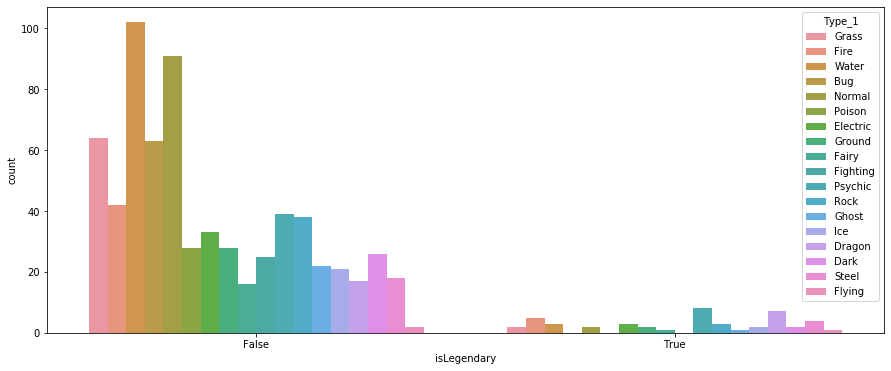

In [0]:
#Plotting 'Type_1' using seaborn function 'countplot' with countplot function, and with the type as a hue (splitting criteria)
plt.figure(figsize=(15, 6))
sns.countplot(data = df , x = 'isLegendary', hue='Type_1')

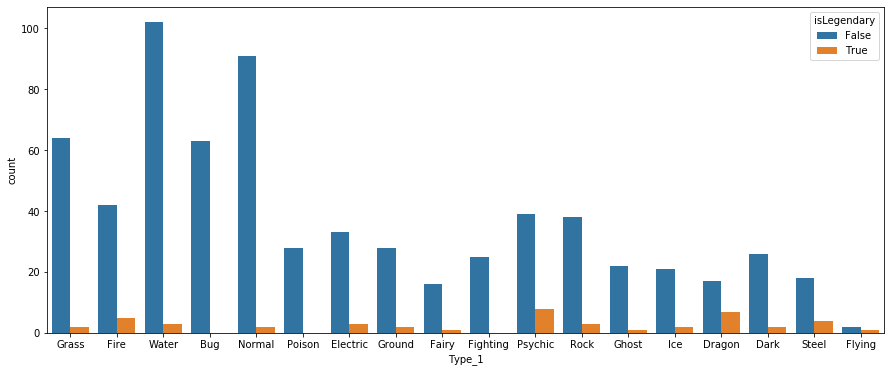

In [0]:
#Plotting 'Type_1' using seaborn function 'countplot' with countplot function, with the legendary 'hue'
plt.figure(figsize=(15, 6))
sns.countplot(data = df , x = 'Type_1', hue='isLegendary')

Number of Legendary :  46


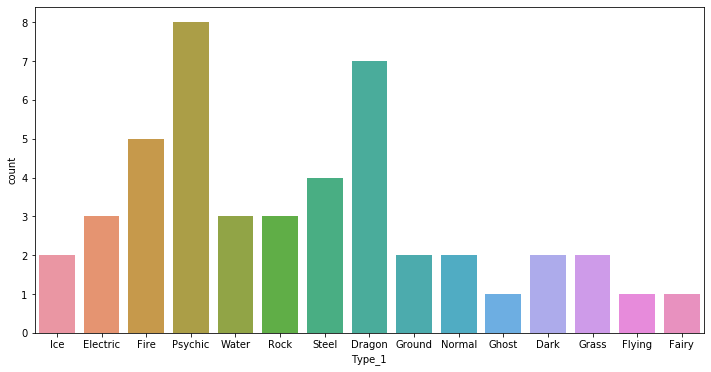

In [0]:
#Plotting 'isLegendary' using seaborn function 'countplot' for only 'with countplot function, with the legendary 'hue'
plt.figure(figsize=(12, 6))
sns.countplot(data = df[df.isLegendary ], x = 'Type_1')
print('Number of Legendary : ' ,len(df[df.isLegendary]))

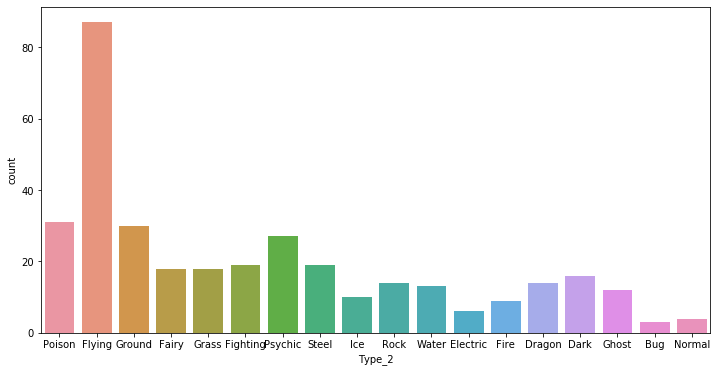

In [0]:
#Plot 'Type_2' Variable using countplot
plt.figure(figsize=(12, 6))
sns.countplot(data = df , x = 'Type_2')

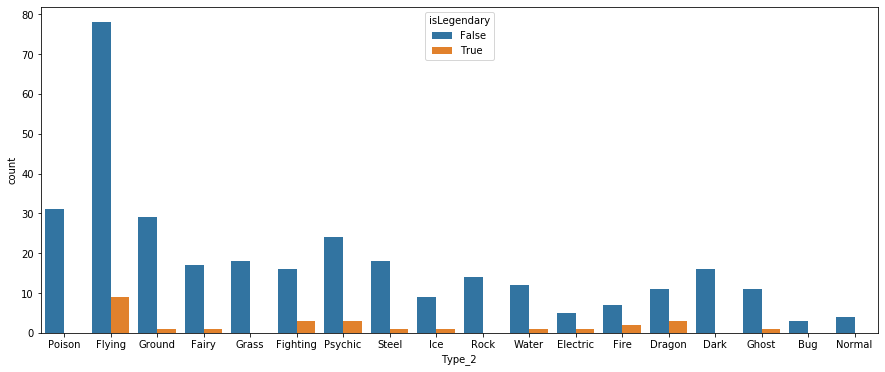

In [0]:
#Plot 'Type_1' with 'isLegendary' as a hue
plt.figure(figsize=(15, 6))
sns.countplot(data = df , x = 'Type_2', hue='isLegendary')

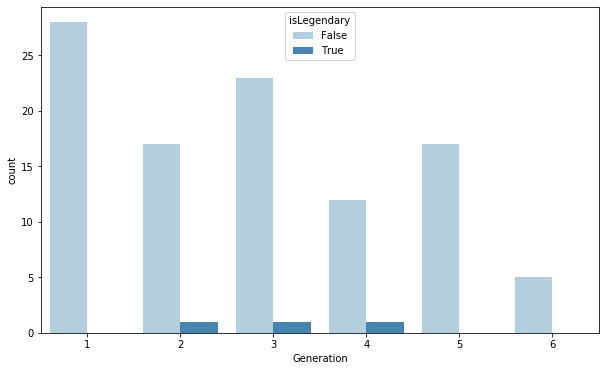

In [0]:
#Let's see the Water pokemon per generation, and see how many legendary pokemon is introduced per generation
plt.figure(figsize=(10, 6))
sns.countplot(data = df[df.Type_1=='Water'] , x = 'Generation', hue='isLegendary',palette="Blues")

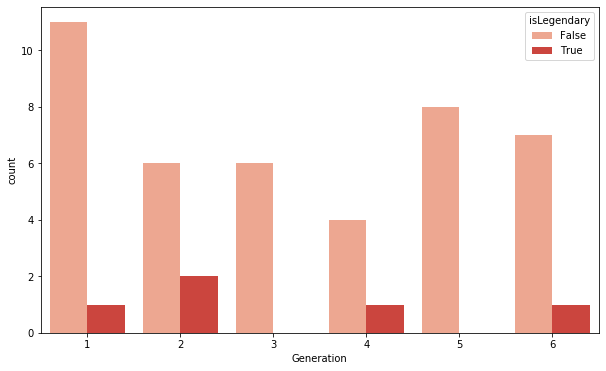

In [0]:
#Let's see the Fire pokemon per generation, and see how many legendary pokemon is introduced per generation
plt.figure(figsize=(10, 6))
sns.countplot(data = df[df.Type_1=='Fire'] , x = 'Generation', hue='isLegendary',palette="Reds")

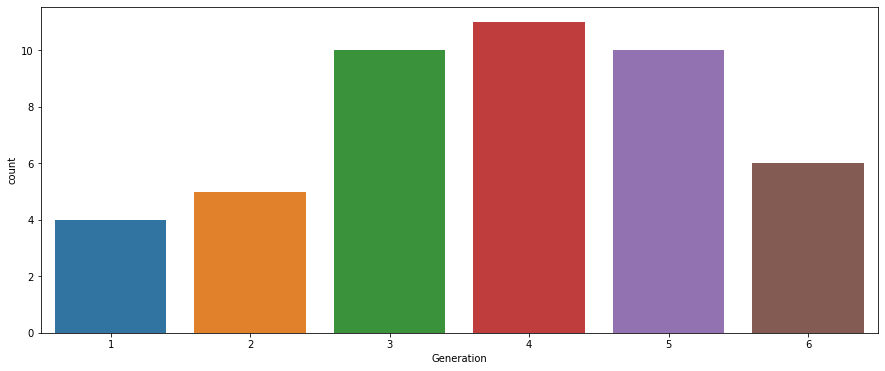

In [0]:
#Plot the number of Legendary Pokemons introduced per Generation :
plt.figure(figsize=(15, 6))
sns.countplot(data = df[df.isLegendary == True] , x = 'Generation')

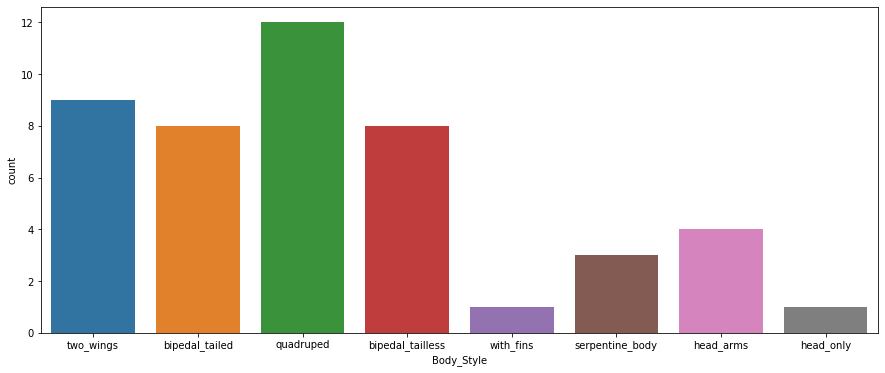

In [0]:
#Plot the Legendary pokemons Body style
plt.figure(figsize=(15, 6))
sns.countplot(data = df[df.isLegendary == True] , x = 'Body_Style')

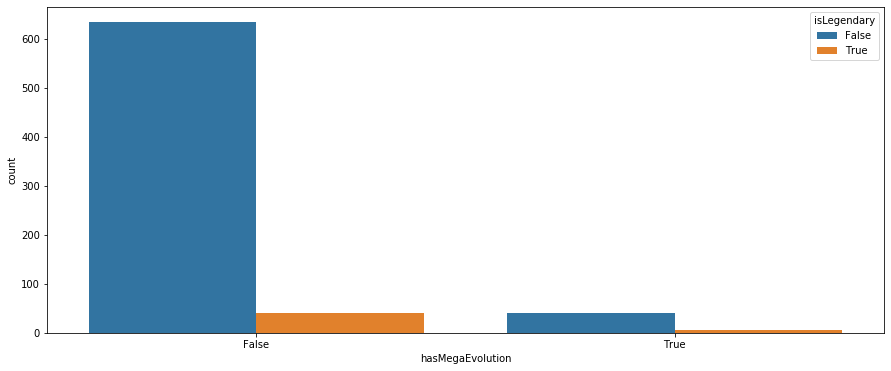

In [0]:
#See the number of Legendary and Normal Pokemons with MegaEvolution, 
plt.figure(figsize=(15, 6))
sns.countplot(data = df , x = 'hasMegaEvolution',hue = 'isLegendary')

## Let's move to Numerial Values

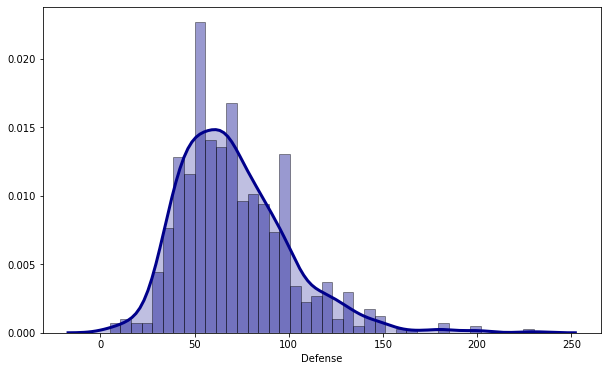

In [0]:
# Density Plot and Histogram of Defense Feature
plt.figure(figsize=(10, 6))
sns.distplot(df['Defense'], hist=True, kde=True, 
             bins=40, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3,'shade': True,})

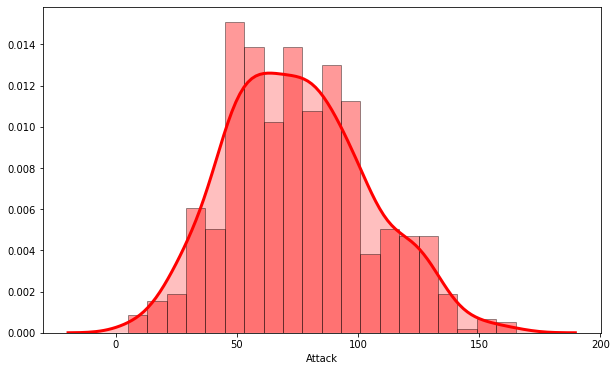

In [0]:
# Density Plot and Histogram of Attack Feature
plt.figure(figsize=(10, 6))
sns.distplot(df['Attack'], hist=True, kde=True, 
             bins=20, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3,'shade': True,})

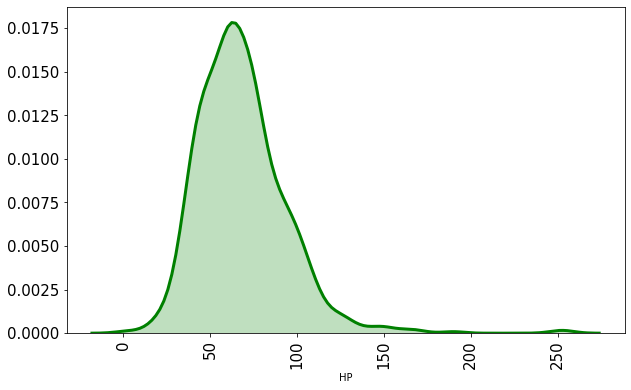

In [0]:
# Density Plot and Histogram of HP Feature
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
sns.distplot(df['HP'], hist=False, kde=True, 
              color = 'green',
             kde_kws={'linewidth': 3,'shade': True,})

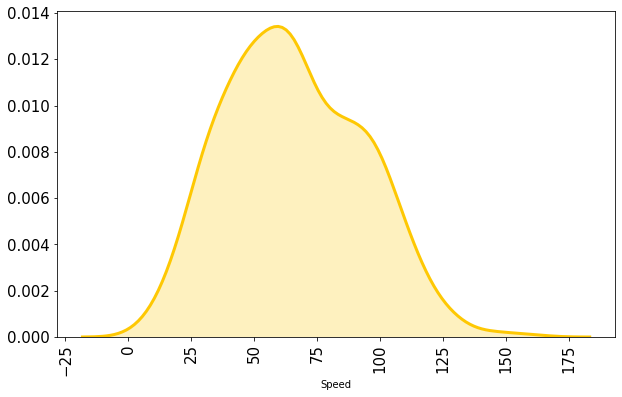

In [0]:
# Density Plot and Histogram of the Speed Feature
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
sns.distplot(df['Speed'], hist=False, kde=True, 
              color = '#FEC803',
             kde_kws={'linewidth': 3,'shade': True,})

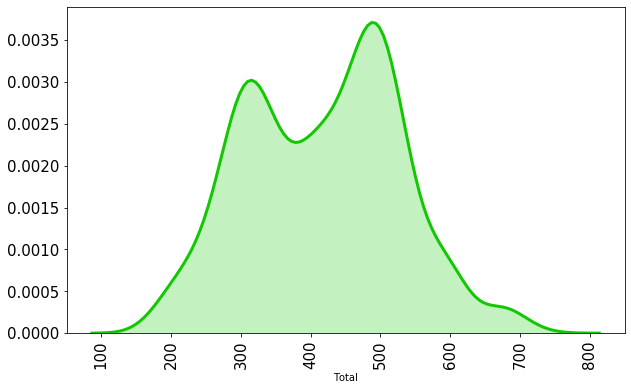

In [0]:
# Density Plot and Histogram of Total Points Feature
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
sns.distplot(df['Total'], hist=False, kde=True,  color = '#12C803',
             kde_kws={'linewidth': 3,'shade': True,})

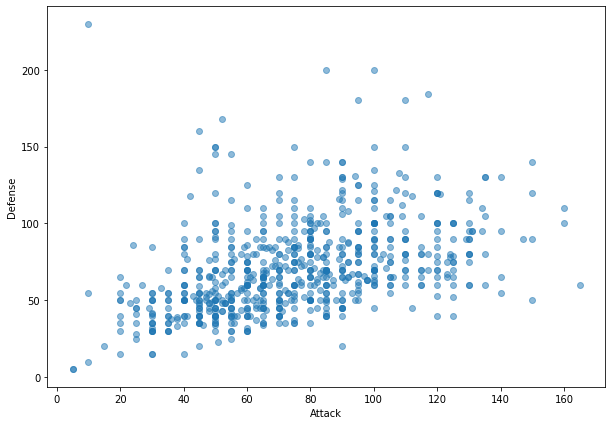

In [0]:
#Scatter plot of Attack and Defense 
plt.figure(figsize=(10, 7))
lab = ['Attack', 'Defense']
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.scatter(x = df.Attack, y = df.Defense, alpha=0.5)
plt.show()

In [0]:
#We will Color the Legendary Pokemons with the Red Color
colors = []
for index,row in df.iterrows():
  if row['isLegendary']==True:
    colors.append('red')
  else:
    colors.append('blue')

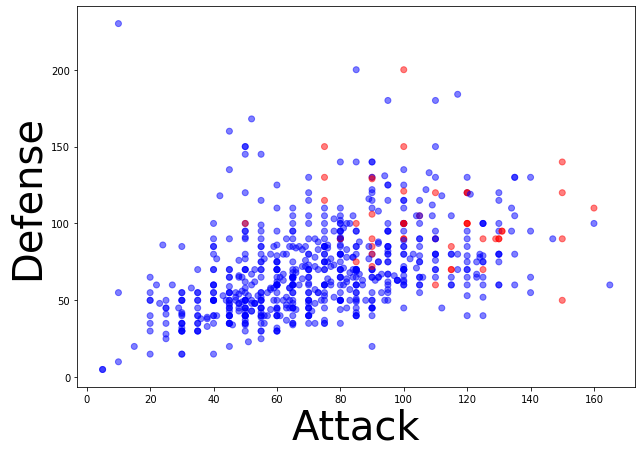

In [0]:
#Now we plot using the Color List we created
plt.figure(figsize=(10, 7))
lab = ['Attack', 'Defense']
plt.xlabel('Attack',fontsize=40)
plt.ylabel('Defense',fontsize=40)
plt.scatter(x = df.Attack, y = df.Defense, alpha=0.5,c=colors)
plt.show()

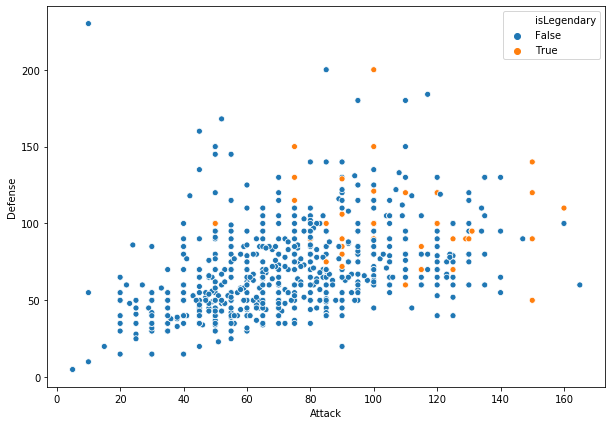

In [0]:
#Seaborn makes our life easier
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df , x="Attack", y="Defense", hue="isLegendary")

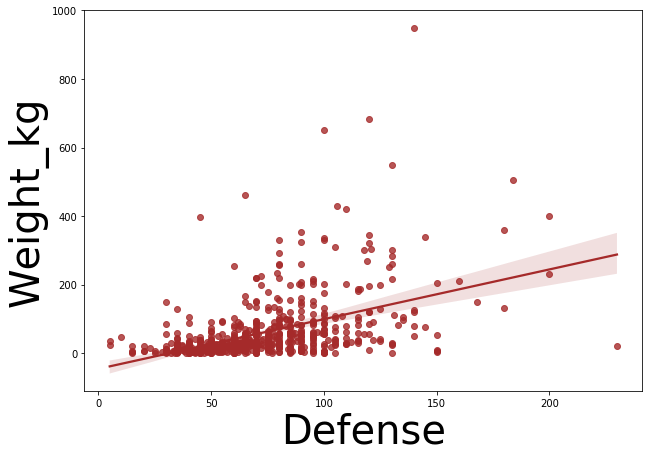

In [0]:
#Now we scatter plot with a linear regression function, using regplot (regression plot), to see the relation between defence and weight
plt.figure(figsize=(10, 7))
plt.xlabel('Defense',fontsize=40)
plt.ylabel('Weight_kg',fontsize=40)
sns.regplot(data = df , x="Defense", y="Weight_kg",color='brown')

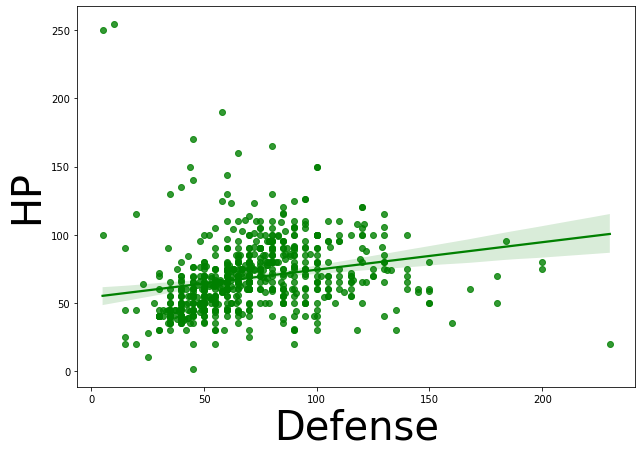

In [0]:
#Now we scatter plot with a linear regression function, using regplot (regression plot), to see the relation between defence and HP
plt.figure(figsize=(10, 7))
plt.xlabel('Defense',fontsize=40)
plt.ylabel('HP',fontsize=40)
sns.regplot(data = df , x="Defense", y="HP",color = 'green')

<Figure size 1080x720 with 0 Axes>

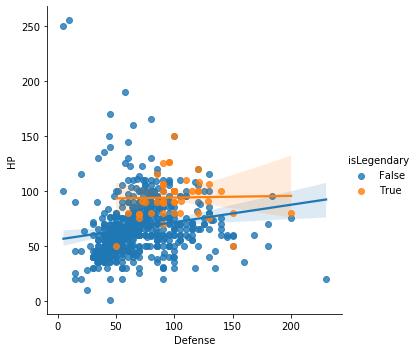

In [0]:
# To see both Legendary and Non Legendary classes regression plot, we use lmplot function
plt.figure(figsize=(15, 10))
sns.lmplot(data = df , x="Defense", y="HP", hue="isLegendary")

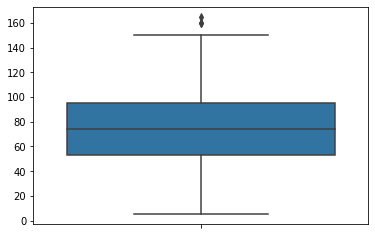

In [0]:
#Move to the Box plot, lets try 'Attack'
sns.boxplot(x=["Attack"], data=df,orient="v")

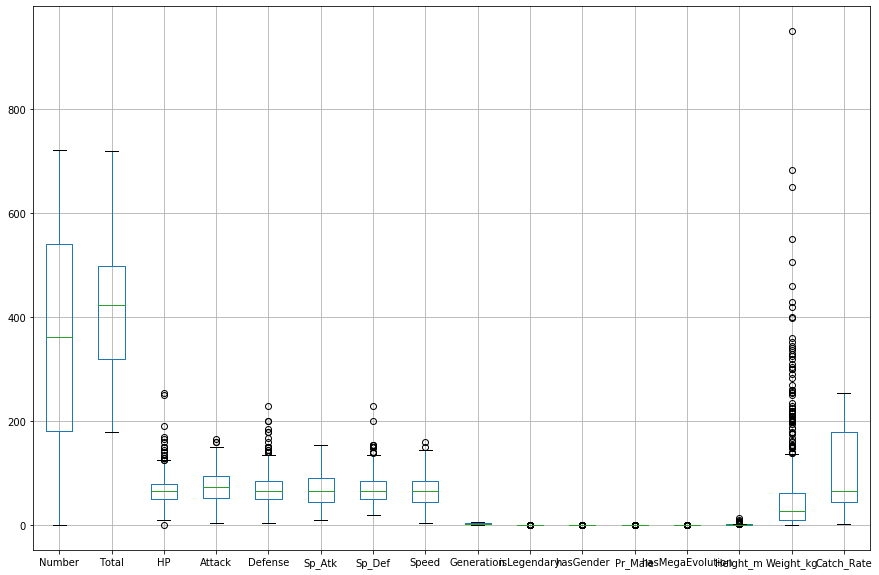

In [0]:
#We can use the defeined function in Pandas, but it is not so pretty
df.boxplot(figsize=(15,10))

In [0]:
#Lets use slicing , to extract Numerical Values
dfNum = df[['Attack','Defense',	'Sp_Atk','Sp_Def','Speed','Catch_Rate','Pr_Male']]

In [0]:
#Melt function help us transform our Dataframe to a format
#where one or more columns are identifier variables, while all other columns, considered measured variables
melt = pd.melt(dfNum)

In [0]:
melt.head()

,variable,value
0,Attack,49.0
1,Attack,62.0
2,Attack,82.0
3,Attack,52.0
4,Attack,64.0


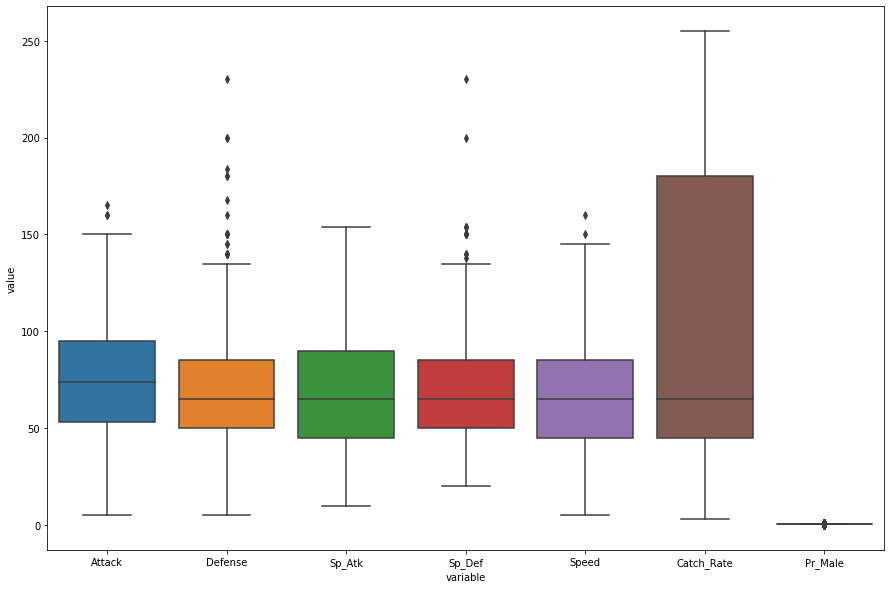

In [0]:
#Now we can use our 'melt' dataframe to diplay multiple columns
plt.figure(figsize=(15, 10))
sns.boxplot(data = melt,x="variable", y="value")

In [0]:
#Now we Seperate Legendary and Normal Pokemons, so we can plot them in a seperated way, to gain more insight
#We start with Legendary Pokemons
dfLegend = dfNum[df.isLegendary==1]

In [0]:
#Now we move to Normal Pokemons
dfNormal= dfNum[df.isLegendary==0]

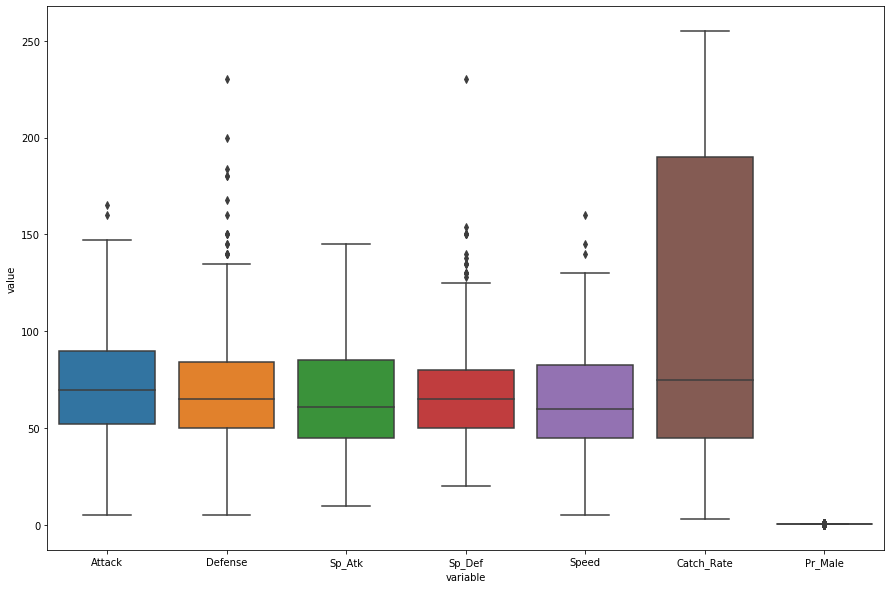

In [0]:
#We boxplot Normal pokemns Dataset
plt.figure(figsize=(15, 10))
sns.boxplot(data = pd.melt(dfNormal),x="variable", y="value")

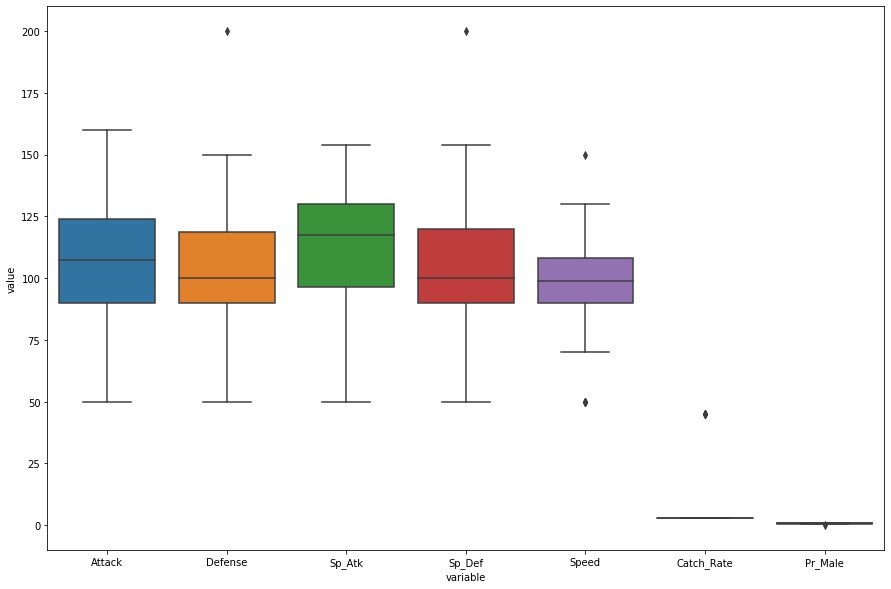

In [0]:
#Now we Plot Legendary Pokemons
plt.figure(figsize=(15, 10))
sns.boxplot(data = pd.melt(dfLegend),x="variable", y="value")

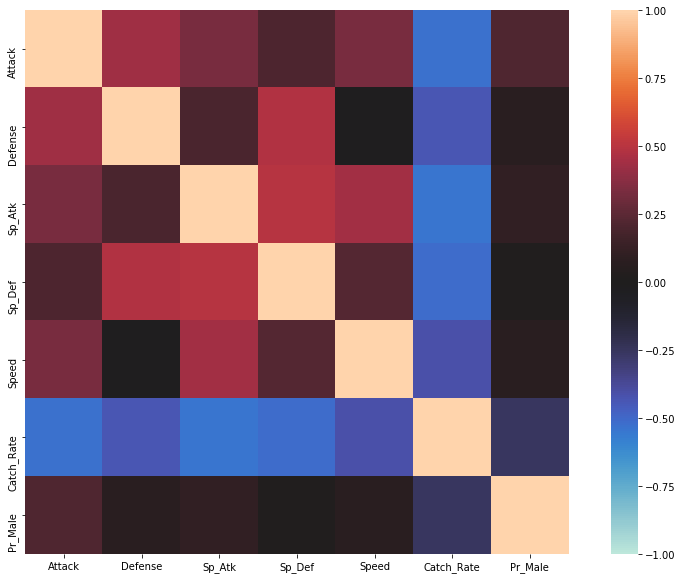

In [0]:
#We plot Correlation Matrix, to see relation between values
corr = dfNum.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0,square=True)

In [0]:
#Check the number of types
#Relation between pokemons who have two types and legendary trait
#Decide to remove or not

In [0]:
df[df.isLegendary == 1].groupby('Type_2').isLegendary.count().sum()
#More than the half

27

In [0]:
for index,row in df.iterrows():
  try :
    np.isnan(row['Type_2']) #is nan generate an error of non convertable to float type is used
    df.at[index,'TwoTypes'] = True
  except:
    df.at[index,'TwoTypes'] = False

In [0]:
df.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
TwoTypes              0
dtype: int64

In [0]:
#Since we don't know if it is a male or not, we simply fill Pr_Male value with 0.5
df.Pr_Male = df.Pr_Male.fillna(0.5)

In [0]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style',
       'TwoTypes'],
      dtype='object')

In [0]:
#Time to drop unecessary Features
df.drop(['Number', 'Name','Type_2','Color','hasGender','Egg_Group_2',
         'Body_Style','hasMegaEvolution','Generation'],axis=1,inplace = True)

In [0]:
#Quick Check
df.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,isLegendary,Pr_Male,Egg_Group_1,Height_m,Weight_kg,Catch_Rate,TwoTypes
0,Grass,318,45,49,49,65,65,45,False,0.875,Monster,0.71,6.9,45,False
1,Grass,405,60,62,63,80,80,60,False,0.875,Monster,0.99,13.0,45,False
2,Grass,525,80,82,83,100,100,80,False,0.875,Monster,2.01,100.0,45,False
3,Fire,309,39,52,43,60,50,65,False,0.875,Monster,0.61,8.5,45,True
4,Fire,405,58,64,58,80,65,80,False,0.875,Monster,1.09,19.0,45,True


#### Now we will encode our Categorical Data, using LabelEncoder from sklearn

In [0]:
from sklearn import preprocessing

In [0]:
le = preprocessing.LabelEncoder()

In [0]:
#First We fit our encoder
le.fit(df.Type_1)

LabelEncoder()

In [0]:
#And then we transform our Data
df.Type_1 = le.transform(df.Type_1)
df.Type_1

0       9
1       9
2       9
3       6
4       6
       ..
716     1
717     2
718    15
719    14
720     6
Name: Type_1, Length: 721, dtype: int64

In [0]:
#Same thing for Egg_Group
le.fit(df.Egg_Group_1)

LabelEncoder()

In [0]:
df.Egg_Group_1 = le.transform(df.Egg_Group_1)

In [0]:
#Another Quick Check
df.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,isLegendary,Pr_Male,Egg_Group_1,Height_m,Weight_kg,Catch_Rate,TwoTypes
0,9,318,45,49,49,65,65,45,False,0.875,10,0.71,6.9,45,False
1,9,405,60,62,63,80,80,60,False,0.875,10,0.99,13.0,45,False
2,9,525,80,82,83,100,100,80,False,0.875,10,2.01,100.0,45,False
3,6,309,39,52,43,60,50,65,False,0.875,10,0.61,8.5,45,True
4,6,405,58,64,58,80,65,80,False,0.875,10,1.09,19.0,45,True


In [0]:
#Describe the dataset
df.describe()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Pr_Male,Egg_Group_1,Height_m,Weight_kg,Catch_Rate
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,9.571429,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,0.547677,7.001387,1.144979,56.773370,100.246879
std,5.561596,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,0.189693,3.853389,1.044369,89.095667,76.573513
min,0.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.000000,0.100000,0.100000,3.000000
25%,5.000000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,0.500000,5.000000,0.610000,9.400000,45.000000
50%,10.000000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,0.500000,6.000000,0.990000,28.000000,65.000000
75%,14.000000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,0.500000,10.000000,1.400000,61.000000,180.000000
max,17.000000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,1.000000,14.000000,14.500000,950.000000,255.000000


### We seperate the Features from Target, in Our case Target is 'isLegendary'

In [0]:
X = df.drop(['isLegendary'],axis = 1)
Y=df.isLegendary

In [0]:
#Feature Scaling : 

from sklearn.preprocessing import StandardScaler

Sc = StandardScaler()

# We need to fit and transform the dataset
dfScale = Sc.fit_transform(df)

### Train_Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#We use a 70%/30% Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [0]:
#First we will try with 50 decision tree, and a Max depth of 5
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50,max_depth=5)
#Here we train our model
model.fit(x_train, y_train)
#And finally, we use the model , and store them on predict variable
predict=model.predict(x_test)

In [0]:
#Now we test the accuracy of our model
from sklearn.metrics import accuracy_score

In [0]:
print(accuracy_score(y_test,predict))

0.9953917050691244


### Since our Data is unbalanced, we will be using Different Metrics to evaluate the Predictions, to see if we predicted minority class correctly, we will be using F1-Score and MCC

#### First We see our confusion Matrix


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
CM = confusion_matrix(y_test, predict)
print(CM)

[[205   1]
 [  0  11]]


In [0]:
CM = pd.DataFrame(CM, range(2), range(2))

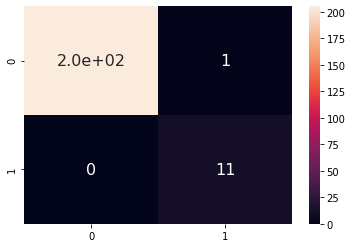

In [0]:
sns.heatmap(data = CM,annot=True, annot_kws={"size": 16})